In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import sequence
from numpy import array
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import string as st
import re
import nltk
from nltk import PorterStemmer, WordNetLemmatizer
import matplotlib.pyplot as plt
import os

In [ ]:
import numpy as np
import pandas as pd

import re
import nltk
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  precision_score, f1_score, classification_report,recall_score

from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/TamilFakeAndReal.csv')
data.shape

(14564, 4)

In [ ]:
data.head()

,Unnamed: 0,English,Tamil,Is Fake
0,0,"""There is no precaution"".. Scolded Chief Minis...",சபரிமலையில் குவியும் பக்தர்கள்: ஐயப்பனை இரவு 1...,0
1,1,34 people have corona in Saidapet Govt Trainin...,ஆரியங்காவு தர்மசாஸ்தா அன்னை புஷ்கலா தேவி திரு...,0
2,2,Hanuman Jayanti at Dhanwandri Peedam: 100008 V...,புலிவாகனத்தில் மகரசங்கராந்தி பிரவேசம் - யாருக்...,0
3,3,Happy New Year 2022: Do you know which country...,தன்வந்திரி பீடத்தில் அனுமன் ஜெயந்தி: நாமக்கல் ...,0
4,4,Devotees thronging Sabarimala: Allowed to visi...,"தடுப்பூசி போடலியா.. பேங்க், ஹோட்டல் கூட போக மு...",0


In [ ]:
data.drop('Unnamed: 0', axis=1, inplace=True)
data.drop('English',axis=1,inplace=True)

In [ ]:
print("Number of fake news:", len(data[data['Is Fake'] == 0]))
print("Number of real news:", len(data[data['Is Fake'] == 1]))

Number of fake news: 11662
Number of real news: 2902


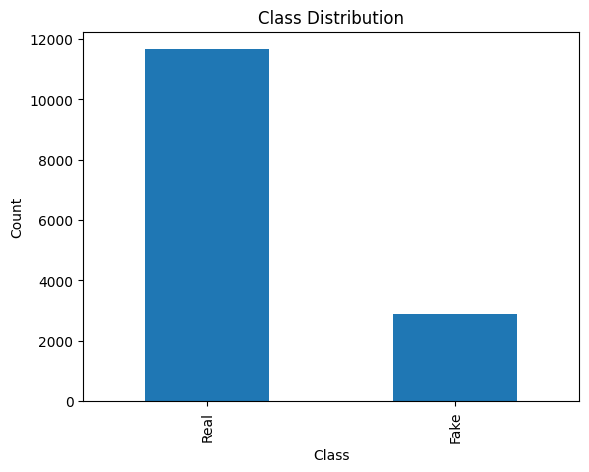

In [ ]:
class_counts = data['Is Fake'].value_counts()

class_counts.plot(kind='bar')

plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks([0, 1], ['Real', 'Fake'])
plt.show()

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
def uniq(text_data):
    unique_words = set()
    for text in text_data:
        words = text.split()
        unique_words.update(words)

    num_unique_words = len(unique_words)
    print("Number of unique words:", num_unique_words)


uniq(data['Tamil'])

Number of unique words: 48760


In [ ]:
data.isnull().sum()

Tamil      0
Is Fake    0
dtype: int64

In [ ]:
def remove_punct(text):
    return ("".join([ch for ch in text if ch not in st.punctuation]))
data['removed_punc'] = data['Tamil'].apply(lambda x: remove_punct(x))
data.head()

def tokenize(text):
    text = re.split('\s+' ,text)
    return [x.lower() for x in text]

data['tokens'] = data['removed_punc'].apply(lambda msg : tokenize(msg))
data.head()

def remove_small_words(text):
    return [x for x in text if len(x) > 3 ]

data['filtered_tokens'] = data['tokens'].apply(lambda x : remove_small_words(x))
data.head()

,Tamil,Is Fake,removed_punc,tokens,filtered_tokens
0,சபரிமலையில் குவியும் பக்தர்கள்: ஐயப்பனை இரவு 1...,0,சபரிமலையில் குவியும் பக்தர்கள் ஐயப்பனை இரவு 11...,"[சபரிமலையில், குவியும், பக்தர்கள், ஐயப்பனை, இர...","[சபரிமலையில், குவியும், பக்தர்கள், ஐயப்பனை, இர..."
1,ஆரியங்காவு தர்மசாஸ்தா அன்னை புஷ்கலா தேவி திரு...,0,ஆரியங்காவு தர்மசாஸ்தா அன்னை புஷ்கலா தேவி திரு...,"[, ஆரியங்காவு, தர்மசாஸ்தா, அன்னை, புஷ்கலா, தேவ...","[ஆரியங்காவு, தர்மசாஸ்தா, அன்னை, புஷ்கலா, தேவி,..."
2,புலிவாகனத்தில் மகரசங்கராந்தி பிரவேசம் - யாருக்...,0,புலிவாகனத்தில் மகரசங்கராந்தி பிரவேசம் யாருக்க...,"[புலிவாகனத்தில், மகரசங்கராந்தி, பிரவேசம், யாரு...","[புலிவாகனத்தில், மகரசங்கராந்தி, பிரவேசம், யாரு..."
3,தன்வந்திரி பீடத்தில் அனுமன் ஜெயந்தி: நாமக்கல் ...,0,தன்வந்திரி பீடத்தில் அனுமன் ஜெயந்தி நாமக்கல் ஆ...,"[தன்வந்திரி, பீடத்தில், அனுமன், ஜெயந்தி, நாமக்...","[தன்வந்திரி, பீடத்தில், அனுமன், ஜெயந்தி, நாமக்..."
4,"தடுப்பூசி போடலியா.. பேங்க், ஹோட்டல் கூட போக மு...",0,தடுப்பூசி போடலியா பேங்க் ஹோட்டல் கூட போக முடிய...,"[தடுப்பூசி, போடலியா, பேங்க், ஹோட்டல், கூட, போக...","[தடுப்பூசி, போடலியா, பேங்க், ஹோட்டல், முடியாது..."


In [ ]:
with open('/content/drive/MyDrive/Tamil-Stopwords.txt', 'r', encoding='utf-8') as file:
    tamil_stopwords = [line.strip() for line in file]

print(tamil_stopwords)

['ஒரு', 'என்று', 'மற்றும்', 'இந்த', 'இது', 'என்ற', 'கொண்டு', 'என்பது', 'பல', 'ஆகும்', 'அல்லது', 'அவர்', 'நான்', 'உள்ள', 'அந்த', 'இவர்', 'என', 'முதல்', 'என்ன', 'இருந்து', 'சில', 'என்', 'போன்ற', 'வேண்டும்', 'வந்து', 'இதன்', 'அது', 'அவன்', 'தான்', 'பலரும்', 'என்னும்', 'மேலும்', 'பின்னர்', 'கொண்ட', 'இருக்கும்', 'தனது', 'உள்ளது', 'போது', 'என்றும்', 'அதன்', 'தன்', 'பிறகு', 'அவர்கள்', 'வரை', 'அவள்', 'நீ', 'ஆகிய', 'இருந்தது', 'உள்ளன', 'வந்த', 'இருந்த', 'மிகவும்', 'இங்கு', 'மீது', 'ஓர்', 'இவை', 'இந்தக்', 'பற்றி', 'வரும்', 'வேறு', 'இரு', 'இதில்', 'போல்', 'இப்போது', 'அவரது', 'மட்டும்', 'இந்தப்', 'எனும்', 'மேல்', 'பின்', 'சேர்ந்த', 'ஆகியோர்', 'எனக்கு', 'இன்னும்', 'அந்தப்', 'அன்று', 'ஒரே', 'மிக', 'அங்கு', 'பல்வேறு', 'விட்டு', 'பெரும்', 'அதை', 'பற்றிய', 'உன்', 'அதிக', 'அந்தக்', 'பேர்', 'இதனால்', 'அவை', 'அதே', 'ஏன்', 'முறை', 'யார்', 'என்பதை', 'எல்லாம்', 'மட்டுமே', 'இங்கே', 'அங்கே', 'இடம்', 'இடத்தில்', 'அதில்', 'நாம்', 'அதற்கு', 'எனவே', 'பிற', 'சிறு', 'மற்ற', 'விட', 'எந்த', 'எனவும்', 'எனப்படும்', 'எனி

In [ ]:
def stop(text):
    result = []
    for sentence in text:
        words = sentence.split(" ")
        result.extend([word for word in words if word not in tamil_stopwords])
    return result

data['clear_stop'] = data['filtered_tokens'].apply(lambda x: stop(x))
print(data['clear_stop'])

0        [சபரிமலையில், குவியும், பக்தர்கள், ஐயப்பனை, இர...
1        [ஆரியங்காவு, தர்மசாஸ்தா, அன்னை, புஷ்கலா, தேவி,...
2        [புலிவாகனத்தில், மகரசங்கராந்தி, பிரவேசம், யாரு...
3        [தன்வந்திரி, பீடத்தில், அனுமன், ஜெயந்தி, நாமக்...
4        [தடுப்பூசி, போடலியா, பேங்க், ஹோட்டல், முடியாது...
                               ...                        
14559    [கொரோனா, நோயாளி, வதந்தி, தற்கொலை, செய்துகொண்ட,...
14560    [அமைதியின்மையை, விளைவிக்கும், வாட்ஸ்அப், தகவலா...
14561          [’ஓட்டுக்குப், பணம், கொடுத்தாரா, முதல்வர்’]
14562    [தகவல், தொழில்நுட்ப, சட்டத்தில், புதிய, திருத்...
14563    [வலதுசாரி, அமைப்புகளால், நாட்டுக்கு, அச்சுறுத்...
Name: clear_stop, Length: 14564, dtype: object


In [ ]:
import nltk
nltk.download('wordnet')
def lemmatize(text):
    word_net = WordNetLemmatizer()
    return [word_net.lemmatize(word) for word in text]
data['lemma_words'] = data['clear_stop'].apply(lambda x : lemmatize(x))
data.head()

def return_sentences(tokens):
    return " ".join([word for word in tokens])
data['clean_text'] = data['lemma_words'].apply(lambda x : return_sentences(x))
data.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...


,Tamil,Is Fake,removed_punc,tokens,filtered_tokens,clear_stop,lemma_words,clean_text
0,சபரிமலையில் குவியும் பக்தர்கள்: ஐயப்பனை இரவு 1...,0,சபரிமலையில் குவியும் பக்தர்கள் ஐயப்பனை இரவு 11...,"[சபரிமலையில், குவியும், பக்தர்கள், ஐயப்பனை, இர...","[சபரிமலையில், குவியும், பக்தர்கள், ஐயப்பனை, இர...","[சபரிமலையில், குவியும், பக்தர்கள், ஐயப்பனை, இர...","[சபரிமலையில், குவியும், பக்தர்கள், ஐயப்பனை, இர...",சபரிமலையில் குவியும் பக்தர்கள் ஐயப்பனை இரவு மண...
1,ஆரியங்காவு தர்மசாஸ்தா அன்னை புஷ்கலா தேவி திரு...,0,ஆரியங்காவு தர்மசாஸ்தா அன்னை புஷ்கலா தேவி திரு...,"[, ஆரியங்காவு, தர்மசாஸ்தா, அன்னை, புஷ்கலா, தேவ...","[ஆரியங்காவு, தர்மசாஸ்தா, அன்னை, புஷ்கலா, தேவி,...","[ஆரியங்காவு, தர்மசாஸ்தா, அன்னை, புஷ்கலா, தேவி,...","[ஆரியங்காவு, தர்மசாஸ்தா, அன்னை, புஷ்கலா, தேவி,...",ஆரியங்காவு தர்மசாஸ்தா அன்னை புஷ்கலா தேவி திருக...
2,புலிவாகனத்தில் மகரசங்கராந்தி பிரவேசம் - யாருக்...,0,புலிவாகனத்தில் மகரசங்கராந்தி பிரவேசம் யாருக்க...,"[புலிவாகனத்தில், மகரசங்கராந்தி, பிரவேசம், யாரு...","[புலிவாகனத்தில், மகரசங்கராந்தி, பிரவேசம், யாரு...","[புலிவாகனத்தில், மகரசங்கராந்தி, பிரவேசம், யாரு...","[புலிவாகனத்தில், மகரசங்கராந்தி, பிரவேசம், யாரு...",புலிவாகனத்தில் மகரசங்கராந்தி பிரவேசம் யாருக்கு...
3,தன்வந்திரி பீடத்தில் அனுமன் ஜெயந்தி: நாமக்கல் ...,0,தன்வந்திரி பீடத்தில் அனுமன் ஜெயந்தி நாமக்கல் ஆ...,"[தன்வந்திரி, பீடத்தில், அனுமன், ஜெயந்தி, நாமக்...","[தன்வந்திரி, பீடத்தில், அனுமன், ஜெயந்தி, நாமக்...","[தன்வந்திரி, பீடத்தில், அனுமன், ஜெயந்தி, நாமக்...","[தன்வந்திரி, பீடத்தில், அனுமன், ஜெயந்தி, நாமக்...",தன்வந்திரி பீடத்தில் அனுமன் ஜெயந்தி நாமக்கல் ஆ...
4,"தடுப்பூசி போடலியா.. பேங்க், ஹோட்டல் கூட போக மு...",0,தடுப்பூசி போடலியா பேங்க் ஹோட்டல் கூட போக முடிய...,"[தடுப்பூசி, போடலியா, பேங்க், ஹோட்டல், கூட, போக...","[தடுப்பூசி, போடலியா, பேங்க், ஹோட்டல், முடியாது...","[தடுப்பூசி, போடலியா, பேங்க், ஹோட்டல், முடியாது...","[தடுப்பூசி, போடலியா, பேங்க், ஹோட்டல், முடியாது...",தடுப்பூசி போடலியா பேங்க் ஹோட்டல் முடியாது போட்...


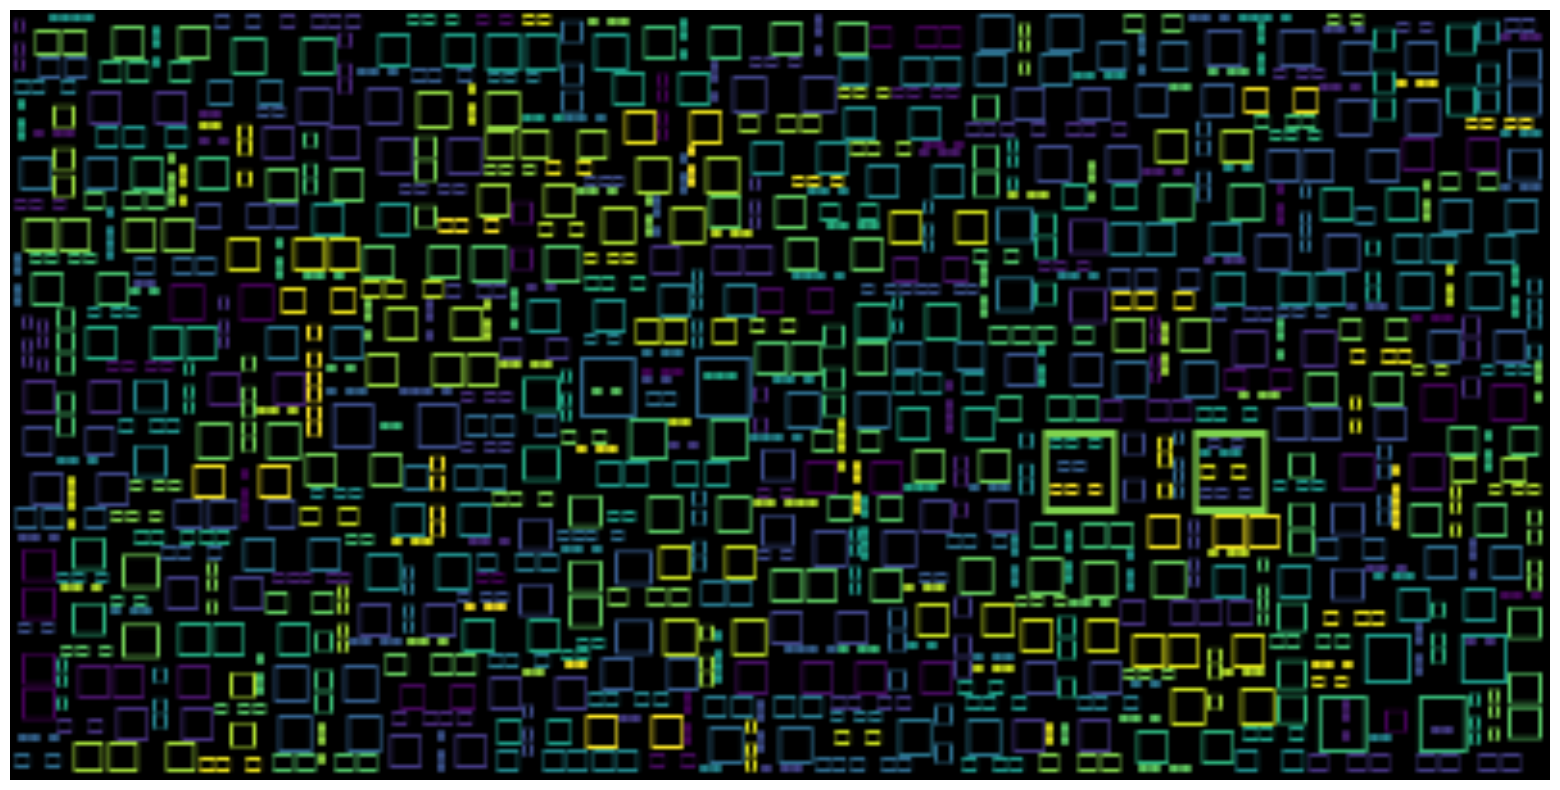

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

font_path = '/content/drive/MyDrive/Kalaham Regular.otf'

text = " ".join([x for x in data['clean_text']])
wordcloud = WordCloud(
    max_font_size=30,
    max_words=1000,
    font_path=font_path,
).generate(text)

plt.figure(figsize=[20, 10])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(data['clean_text'], data['Tamil'], test_size=0.5, random_state = 5)

print("Shape of X_train:",X_train.shape)
print("Shape of X_test:",X_test.shape)

Shape of X_train: (7282,)
Shape of X_test: (7282,)


In [ ]:
data.head()

,Tamil,Is Fake,removed_punc,tokens,filtered_tokens,clear_stop,lemma_words,clean_text
0,சபரிமலையில் குவியும் பக்தர்கள்: ஐயப்பனை இரவு 1...,0,சபரிமலையில் குவியும் பக்தர்கள் ஐயப்பனை இரவு 11...,"[சபரிமலையில், குவியும், பக்தர்கள், ஐயப்பனை, இர...","[சபரிமலையில், குவியும், பக்தர்கள், ஐயப்பனை, இர...","[சபரிமலையில், குவியும், பக்தர்கள், ஐயப்பனை, இர...","[சபரிமலையில், குவியும், பக்தர்கள், ஐயப்பனை, இர...",சபரிமலையில் குவியும் பக்தர்கள் ஐயப்பனை இரவு மண...
1,ஆரியங்காவு தர்மசாஸ்தா அன்னை புஷ்கலா தேவி திரு...,0,ஆரியங்காவு தர்மசாஸ்தா அன்னை புஷ்கலா தேவி திரு...,"[, ஆரியங்காவு, தர்மசாஸ்தா, அன்னை, புஷ்கலா, தேவ...","[ஆரியங்காவு, தர்மசாஸ்தா, அன்னை, புஷ்கலா, தேவி,...","[ஆரியங்காவு, தர்மசாஸ்தா, அன்னை, புஷ்கலா, தேவி,...","[ஆரியங்காவு, தர்மசாஸ்தா, அன்னை, புஷ்கலா, தேவி,...",ஆரியங்காவு தர்மசாஸ்தா அன்னை புஷ்கலா தேவி திருக...
2,புலிவாகனத்தில் மகரசங்கராந்தி பிரவேசம் - யாருக்...,0,புலிவாகனத்தில் மகரசங்கராந்தி பிரவேசம் யாருக்க...,"[புலிவாகனத்தில், மகரசங்கராந்தி, பிரவேசம், யாரு...","[புலிவாகனத்தில், மகரசங்கராந்தி, பிரவேசம், யாரு...","[புலிவாகனத்தில், மகரசங்கராந்தி, பிரவேசம், யாரு...","[புலிவாகனத்தில், மகரசங்கராந்தி, பிரவேசம், யாரு...",புலிவாகனத்தில் மகரசங்கராந்தி பிரவேசம் யாருக்கு...
3,தன்வந்திரி பீடத்தில் அனுமன் ஜெயந்தி: நாமக்கல் ...,0,தன்வந்திரி பீடத்தில் அனுமன் ஜெயந்தி நாமக்கல் ஆ...,"[தன்வந்திரி, பீடத்தில், அனுமன், ஜெயந்தி, நாமக்...","[தன்வந்திரி, பீடத்தில், அனுமன், ஜெயந்தி, நாமக்...","[தன்வந்திரி, பீடத்தில், அனுமன், ஜெயந்தி, நாமக்...","[தன்வந்திரி, பீடத்தில், அனுமன், ஜெயந்தி, நாமக்...",தன்வந்திரி பீடத்தில் அனுமன் ஜெயந்தி நாமக்கல் ஆ...
4,"தடுப்பூசி போடலியா.. பேங்க், ஹோட்டல் கூட போக மு...",0,தடுப்பூசி போடலியா பேங்க் ஹோட்டல் கூட போக முடிய...,"[தடுப்பூசி, போடலியா, பேங்க், ஹோட்டல், கூட, போக...","[தடுப்பூசி, போடலியா, பேங்க், ஹோட்டல், முடியாது...","[தடுப்பூசி, போடலியா, பேங்க், ஹோட்டல், முடியாது...","[தடுப்பூசி, போடலியா, பேங்க், ஹோட்டல், முடியாது...",தடுப்பூசி போடலியா பேங்க் ஹோட்டல் முடியாது போட்...


In [ ]:
corpus = data['clean_text']
df = data['Is Fake']

In [ ]:
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
y = df.values

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_resampled, y_resampled = smote.fit_resample(X, y)
print(X_resampled.shape,y_resampled.shape)

(23324, 1500) (23324,)


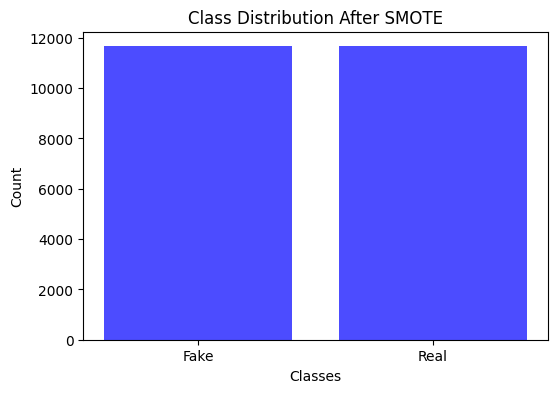

In [ ]:
class_counts = {class_label: sum(y_resampled == class_label) for class_label in set(y_resampled)}

class_counts_values = list(class_counts.values())

plt.figure(figsize=(6, 4))
plt.bar(range(len(class_counts_values)), class_counts_values, color='b', alpha=0.7)
plt.xlabel('Classes')
plt.ylabel('Count')
plt.xticks([0, 1], ['Fake', 'Real'])
plt.title('Class Distribution After SMOTE')
plt.show()

Classifier: Logistic Regression
Accuracy: 0.91
Precision: 0.89
Recall:0.93
F1 Score: 0.91
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      2341
           1       0.89      0.93      0.91      2324

    accuracy                           0.91      4665
   macro avg       0.91      0.91      0.91      4665
weighted avg       0.91      0.91      0.91      4665

----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


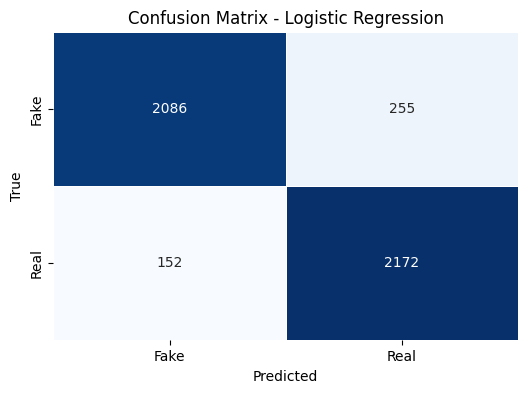

Classifier: SVM
Accuracy: 0.91
Precision: 0.90
Recall:0.92
F1 Score: 0.91
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      2341
           1       0.90      0.92      0.91      2324

    accuracy                           0.91      4665
   macro avg       0.91      0.91      0.91      4665
weighted avg       0.91      0.91      0.91      4665

----------------------------------------


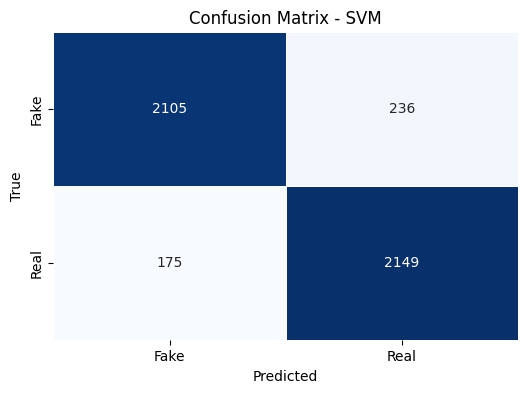

Classifier: Naive Bayes
Accuracy: 0.89
Precision: 0.90
Recall:0.87
F1 Score: 0.89
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      2341
           1       0.90      0.87      0.89      2324

    accuracy                           0.89      4665
   macro avg       0.89      0.89      0.89      4665
weighted avg       0.89      0.89      0.89      4665

----------------------------------------


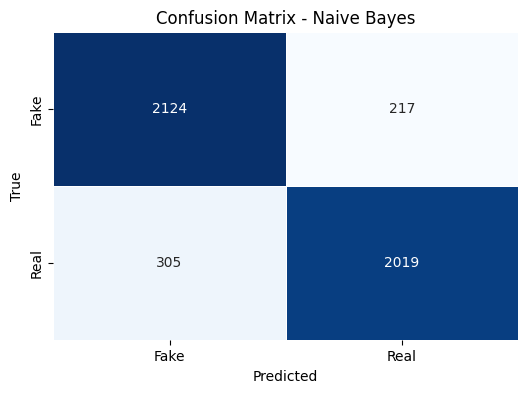

Classifier: KNN
Accuracy: 0.57
Precision: 0.54
Recall:1.00
F1 Score: 0.70
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.15      0.26      2341
           1       0.54      1.00      0.70      2324

    accuracy                           0.57      4665
   macro avg       0.76      0.57      0.48      4665
weighted avg       0.77      0.57      0.48      4665

----------------------------------------


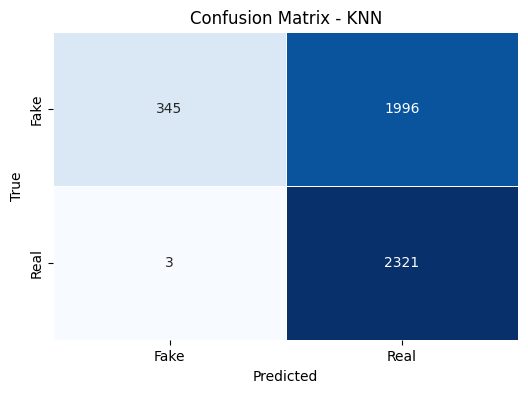

Classifier: Decision Tree
Accuracy: 0.86
Precision: 0.83
Recall:0.90
F1 Score: 0.86
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.81      0.85      2341
           1       0.83      0.90      0.86      2324

    accuracy                           0.86      4665
   macro avg       0.86      0.86      0.86      4665
weighted avg       0.86      0.86      0.86      4665

----------------------------------------


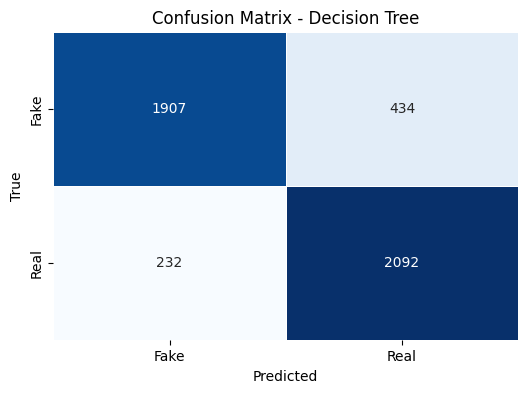

Classifier: Random Forest
Accuracy: 0.91
Precision: 0.90
Recall:0.92
F1 Score: 0.91
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      2341
           1       0.90      0.92      0.91      2324

    accuracy                           0.91      4665
   macro avg       0.91      0.91      0.91      4665
weighted avg       0.91      0.91      0.91      4665

----------------------------------------


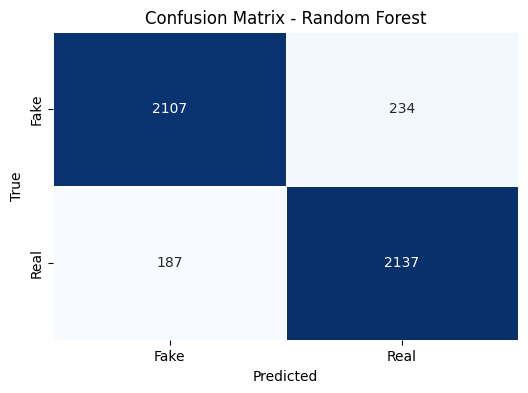

Classifier: Passive Agressive
Accuracy: 0.89
Precision: 0.88
Recall:0.91
F1 Score: 0.89
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      2341
           1       0.88      0.91      0.89      2324

    accuracy                           0.89      4665
   macro avg       0.89      0.89      0.89      4665
weighted avg       0.89      0.89      0.89      4665

----------------------------------------


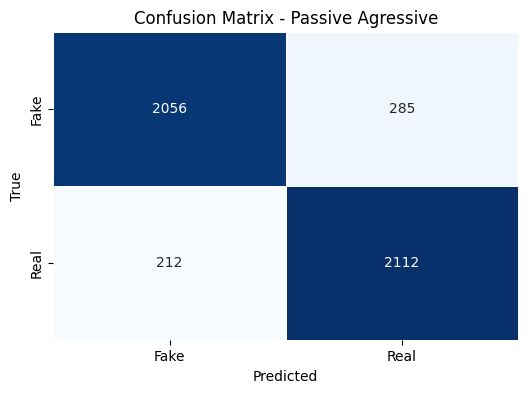

In [ ]:
import seaborn as sns
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)

classifier = {'Logistic Regression':LogisticRegression(),'SVM':svm.SVC(kernel='linear'),'Naive Bayes':MultinomialNB(),
              'KNN':KNeighborsClassifier(),'Decision Tree':DecisionTreeClassifier(),'Random Forest':RandomForestClassifier(),'Passive Agressive':PassiveAggressiveClassifier()}

accuracy_scores = {}

for model_name, model in classifier.items():
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    accuracy = accuracy_score(y_test, ypred)
    precision = precision_score(y_test, ypred)
    recall = recall_score(y_test, ypred)
    f1 = f1_score(y_test, ypred)
    report = classification_report(y_test, ypred)

    print(f"Classifier: {model_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall:{recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print("Classification Report:")
    print(report)
    print("-" * 40)
    accuracy_scores[model_name] = accuracy


    cm = confusion_matrix(y_test,ypred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)

    plt.xlabel('Predicted')
    plt.ylabel('True')

    class_names = ['Fake', 'Real']
    tick_marks = [0.5, 1.5]
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()




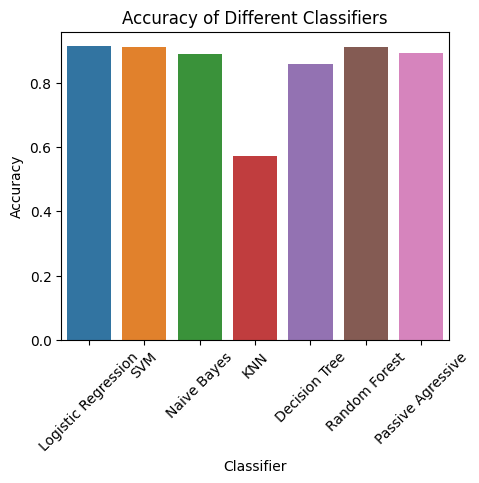

In [ ]:
# Plot the accuracy for each classifier
plt.figure(figsize=(5, 4))
sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()))
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classifiers')
plt.xticks(rotation=45)
plt.show()

In [ ]:
msg = "வலதுசாரி அமைப்புகளால் நாட்டுக்கு அச்சுறுத்தல்: பிரகாஷ்ராஜ்"
input1 = [msg]

input_data = cv.transform(input1).toarray()
for i in classifier:
  input_pred = classifier[i].predict(input_data)

  if input_pred[0]==1:
      print(classifier[i], ": Msg is Real")
  else:
      print(classifier[i], ":Msg is Fake")

LogisticRegression() :Msg is Fake
SVC(kernel='linear') :Msg is Fake
MultinomialNB() :Msg is Fake
KNeighborsClassifier() : Msg is Real
DecisionTreeClassifier() : Msg is Real
RandomForestClassifier() : Msg is Real
PassiveAggressiveClassifier() : Msg is Real
